# Assessment of the performance of the RA and PC-TSP models
## Based on computational time on various datasets


### Plan:

- Load all functions from modules, all dependencies
- Load all datasets for the analysis
- Run each algorithm in a loop, saving the time of ONLY the optimization algorithm
- Save the timing into a df
- Show the timings in a table (with the dataset details,  time taken by each algorithm)

In [1]:
from Data import *
from pctstp import *
from ra import *
import os

In [2]:
# List the .xlsx files in the Data folder
files = os.listdir("Data")
filepaths = ["data/" + file for file in files if file.endswith('.xlsx')]
# remove the SmallDataset
filepaths.remove("data/SmallDataset.xlsx")
print(filepaths)

# Make dictionaries to store the data for each file
ra_data = {}
pctsp_data = {}

# Load the data from each file
for filepath in filepaths:
    file_name = os.path.basename(filepath)
    file_name = file_name.split('.')[0]
    pairs, altruistic_donors, nodes, edges = get_data(filepath, pc_tsp=False)
    ra_data[file_name] = {
        "pairs": pairs,
        "altruistic_donors": altruistic_donors,
        "nodes": nodes,
        "edges": edges
    }
    G_pctsp, pairs_pctsp, altruistic_donors_pctsp, nodes_pctsp, edges_pctsp, all_cycles_pctsp = get_data(filepath, max_cycle=3, pc_tsp=True)
    pctsp_data[file_name] = {
        "G": G_pctsp,
        "pairs": pairs_pctsp,
        "altruistic_donors": altruistic_donors_pctsp,
        "nodes": nodes_pctsp,
        "edges": edges_pctsp,
        "all_cycles": all_cycles_pctsp
    }


['data/Dataset1.xlsx', 'data/Dataset10.xlsx', 'data/Dataset11.xlsx', 'data/Dataset12.xlsx', 'data/Dataset13.xlsx', 'data/Dataset14.xlsx', 'data/Dataset15.xlsx', 'data/Dataset16.xlsx', 'data/Dataset17.xlsx', 'data/Dataset18.xlsx', 'data/Dataset19.xlsx', 'data/Dataset2.xlsx', 'data/Dataset20.xlsx', 'data/Dataset21.xlsx', 'data/Dataset22.xlsx', 'data/Dataset23.xlsx', 'data/Dataset24.xlsx', 'data/Dataset25.xlsx', 'data/Dataset3.xlsx', 'data/Dataset4.xlsx', 'data/Dataset5.xlsx', 'data/Dataset6.xlsx', 'data/Dataset7.xlsx', 'data/Dataset8.xlsx', 'data/Dataset9.xlsx']


In [3]:
# Example of accessing the data
check_dataset = pctsp_data['Dataset1']
print(check_dataset['all_cycles'])


{(0.0, 189.0, 93.0): 89.0, (0.0, 217.0, 65.0): 132.0, (2.0, 22.0, 167.0): 150.0, (2.0, 22.0, 217.0): 192.0, (2.0, 25.0, 207.0): 145.0, (2.0, 76.0, 5.0): 153.0, (2.0, 84.0, 5.0): 187.0, (2.0, 193.0, 15.0): 188.0, (2.0, 193.0, 126.0): 205.0, (2.0, 193.0, 155.0): 134.0, (2.0, 193.0, 167.0): 224.0, (2.0, 214.0, 93.0): 126.0, (3.0, 179.0, 160.0): 203.0, (4.0, 179.0, 220.0): 171.0, (5.0, 7.0, 76.0): 91.0, (5.0, 15.0, 76.0): 93.0, (5.0, 15.0, 84.0): 106.0, (5.0, 18.0, 76.0): 131.0, (5.0, 20.0, 76.0): 120.0, (5.0, 22.0, 76.0): 181.0, (5.0, 33.0, 76.0): 49.0, (5.0, 51.0, 76.0): 100.0, (5.0, 61.0, 76.0): 172.0, (5.0, 66.0, 76.0): 132.0, (5.0, 77.0, 76.0): 213.0, (5.0, 80.0, 76.0): 147.0, (5.0, 83.0, 76.0): 162.0, (5.0, 91.0, 76.0): 163.0, (5.0, 94.0, 76.0): 106.0, (5.0, 117.0, 76.0): 175.0, (5.0, 132.0, 76.0): 210.0, (5.0, 136.0, 15.0): 188.0, (5.0, 136.0, 76.0): 152.0, (5.0, 136.0, 190.0): 253.0, (5.0, 139.0, 76.0): 63.0, (5.0, 169.0, 76.0): 147.0, (5.0, 171.0, 76.0): 140.0, (5.0, 174.0, 76.0):

In [4]:
# Load existing results if they exist
results_file = 'results_table.csv'

if os.path.exists(results_file):
    results = pd.read_csv(results_file)
else:
    results = pd.DataFrame(columns = ['Dataset', 'NDDs', 'Pairs', 'Edges', 'Cycles', 'RA', 'PCTSP'])
    results['Dataset'] = [os.path.basename(filepath).split('.')[0] for filepath in filepaths]
    results['NDDs'] = [len(ra_data[dataset]['altruistic_donors']) for dataset in ra_data]
    results['Pairs'] = [len(ra_data[dataset]['pairs']) for dataset in ra_data]
    results['Edges'] = [len(ra_data[dataset]['edges']) for dataset in ra_data]
    results['Cycles'] = [len(pctsp_data[dataset]['all_cycles']) for dataset in pctsp_data]
    results.to_csv(results_file, index=False)

# Run the RA and PCTSP algorithms on each dataset and save the results
for dataset in ra_data:
    
    if dataset in results['Dataset'].values and results.loc[results['Dataset'] == dataset, ['RA', 'PCTSP']].notnull().all(axis=None).all():
        print(f"Skipping {dataset} as it has already been processed.")
        continue
    
    pairs = ra_data[dataset]['pairs']
    altruistic_donors = ra_data[dataset]['altruistic_donors']
    nodes = ra_data[dataset]['nodes']
    edges = ra_data[dataset]['edges']
    
    G_pctsp = pctsp_data[dataset]['G']
    pairs_pctsp = pctsp_data[dataset]['pairs']
    altruistic_donors_pctsp = pctsp_data[dataset]['altruistic_donors']
    nodes_pctsp = pctsp_data[dataset]['nodes']
    edges_pctsp = pctsp_data[dataset]['edges']
    all_cycles_pctsp = pctsp_data[dataset]['all_cycles']
    
    print(f"Running on {dataset}")
    opt_val_ra, _, time_taken_ra, *rest = ra(pairs, altruistic_donors, edges, noisy=0)
    opt_val_pctsp, edges_pctsp, cycles_pctsp, time_taken_pctsp = pctsp(G_pctsp, pairs_pctsp, altruistic_donors_pctsp, nodes_pctsp, edges_pctsp, all_cycles_pctsp, noisy=0)

    results.loc[results['Dataset'] == dataset, ['RA', 'PCTSP']] = [time_taken_ra, time_taken_pctsp]

# Save the updated results to the CSV file
results.to_csv(results_file, index=False)

Running on Dataset1


c:\Users\s1975950\Desktop\taor_project\ra.py:56: LicenseWarning: Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('C:/xpressmp/bin/xpauth.xpr')

  prob = xp.problem()


Running on Dataset10
Running on Dataset11
Running on Dataset12
Running on Dataset13
Running on Dataset14
Running on Dataset15
Running on Dataset16
Running on Dataset17
Running on Dataset18
Running on Dataset19
Running on Dataset2
Running on Dataset20
Running on Dataset21
Running on Dataset22
Running on Dataset23
Running on Dataset24
Running on Dataset25
Running on Dataset3
Running on Dataset4
Running on Dataset5
Running on Dataset6
Running on Dataset7
Running on Dataset8
Running on Dataset9


In [5]:
# Run this if you get new results from the above cell
# Save the updated results to the CSV file
results.to_csv(results_file, index=False)

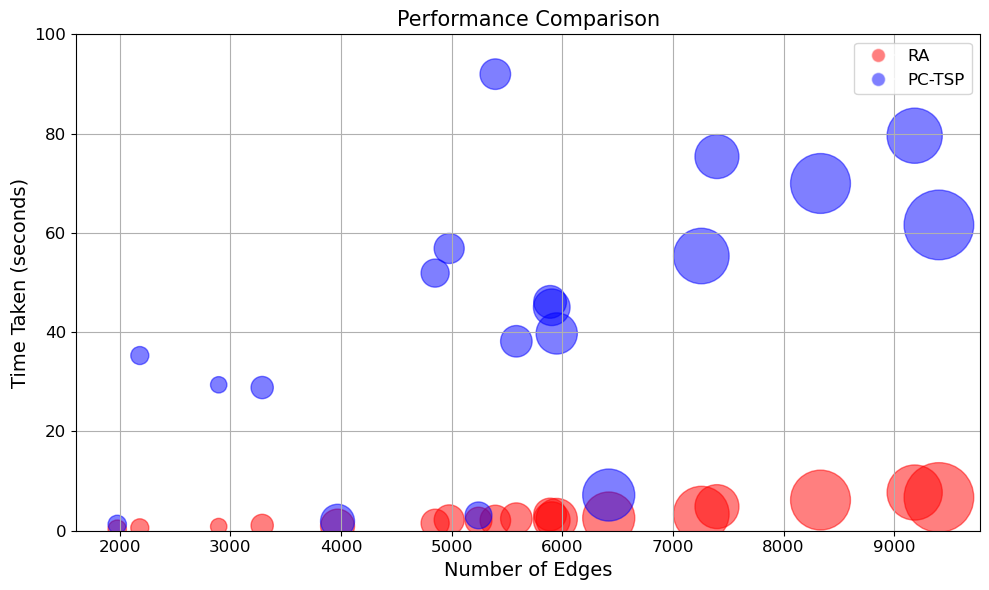

In [12]:
# Plot the comparison
results_file = 'results_table.csv'
results = pd.read_csv(results_file)

# Filter results to only include datasets where PCTSP time is less than 100
filtered_results = results[results['PCTSP'] < 100]
 
plt.figure(figsize=(10, 6))
# Plot RA results
plt.scatter(filtered_results['Edges'], filtered_results['RA'], color='red', label='RA', s=filtered_results['Cycles']/2, alpha=0.5)
# Plot PC-TSP results
plt.scatter(filtered_results['Edges'], filtered_results['PCTSP'], color='blue', label='PC-TSP', s=filtered_results['Cycles']/2, alpha=0.5)


plt.ylim(0, 100)
plt.xlabel('Number of Edges', fontsize=14)
plt.ylabel('Time Taken (seconds)', fontsize=14)  
plt.title('Performance Comparison', fontsize=15)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# Create a legend with fixed circle sizes
handles, labels = plt.gca().get_legend_handles_labels()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor='red' if label == 'RA' else 'blue', markersize=10, alpha=0.5)
                   for label in labels]
plt.legend(handles=legend_elements, labels=labels, fontsize=12)
plt.grid(True)

# Show the plot
plt.show()